<a href="https://colab.research.google.com/github/junheecho-zz/play2021/blob/master/Training_Grape_Type_Classifier_using_fastai2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reference

1. [fastai tutorial](https://docs.fast.ai/tutorial.vision.html)
1. [Deep Learning Image Classification with Fastai](https://towardsdatascience.com/deep-learning-image-classification-with-fast-ai-fc4dc9052106)

# grape type clasifier using fastai2

## 1. Download grape dataset

In [1]:
%%capture
!rm -rf grape_dataset
!wget https://www.dropbox.com/s/cdle49xzq3kcwnq/grape-dataset.tar.gz?dl=0 -O grape_dataset.tar.gz
!tar xvfz grape_dataset.tar.gz

## 2. Training 

### Import relevant modules

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 13.3 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
     |████████████████████████████████| 186 kB 49.5 MB/s 
     |████████████████████████████████| 1.2 MB 38.5 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 51 kB 357 kB/s 
Mounted at /content/gdrive


In [3]:
from fastai.vision.all import *
import fastai
fastai.__version__

'2.5.2'

### Verifying dataset images

In [6]:
import glob

files = glob.glob("grape-dataset/**/*.jpg", recursive=True)
failed = verify_images(files)
print ('corrupted images', failed)
if len(failed) > 0:
  failed.map(os.remove)
  print ('deleted', failed)

corrupted images ['grape-dataset/shine muscat grape/0043.jpg']
delete corrupted images!


### Training (Transfer learning)

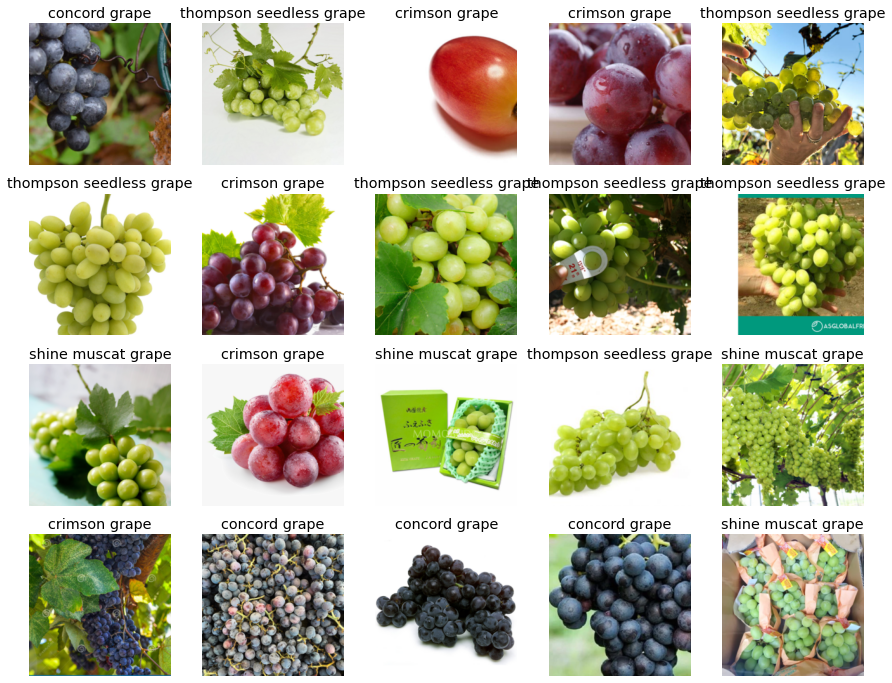

In [7]:
tfms = aug_transforms(flip_vert=False)
path = './grape-dataset'
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224))
dls.show_batch(max_n=20)

In [9]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


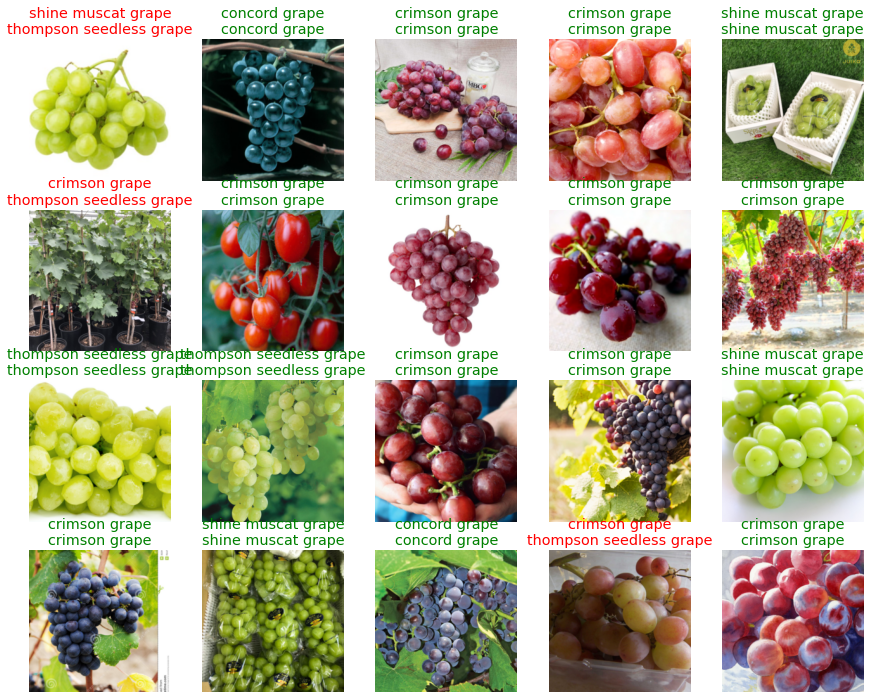

In [10]:
learn.show_results(max_n=20)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

SuggestedLRs(valley=5.248074739938602e-05)

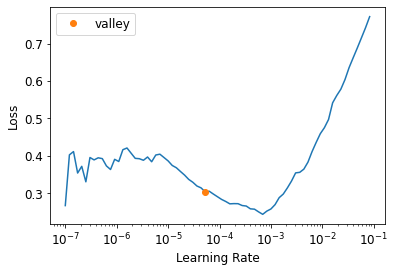

In [11]:
learn.lr_find()

In [12]:
learn.fine_tune(2, 5e-05)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

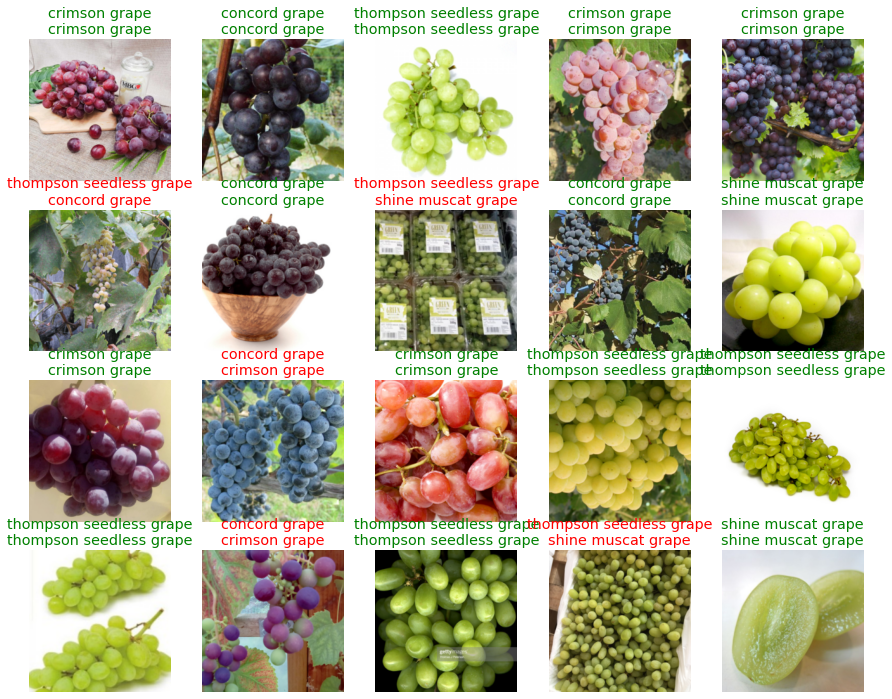

In [13]:
learn.show_results(max_n=20)

### Interpretation

**plot top losses**

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


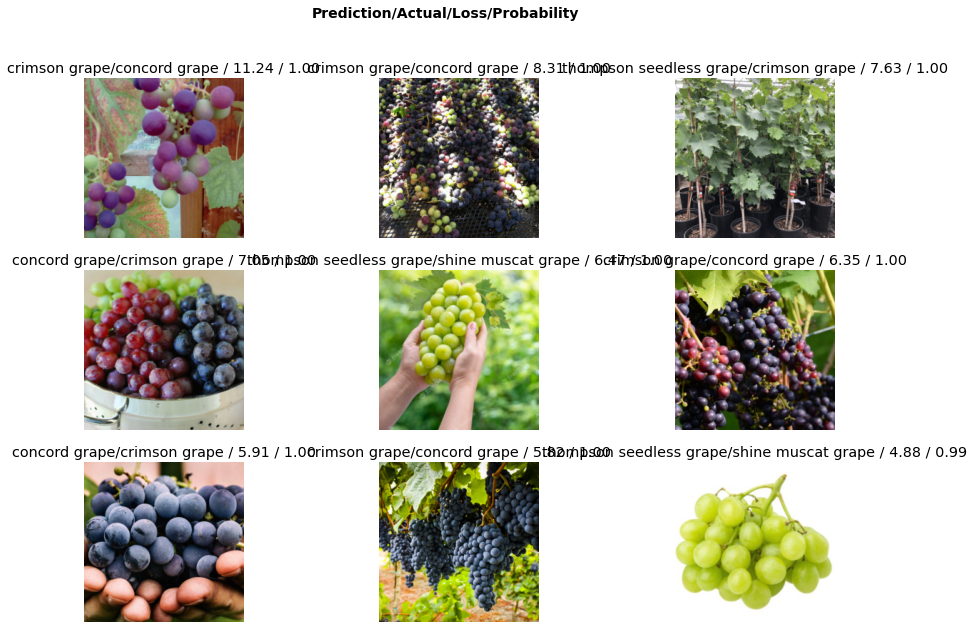

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

In [21]:
interp.most_confused(min_val=9)

[('concord grape', 'crimson grape', 12),
 ('shine muscat grape', 'thompson seedless grape', 9)]

**Confusion Matrix**

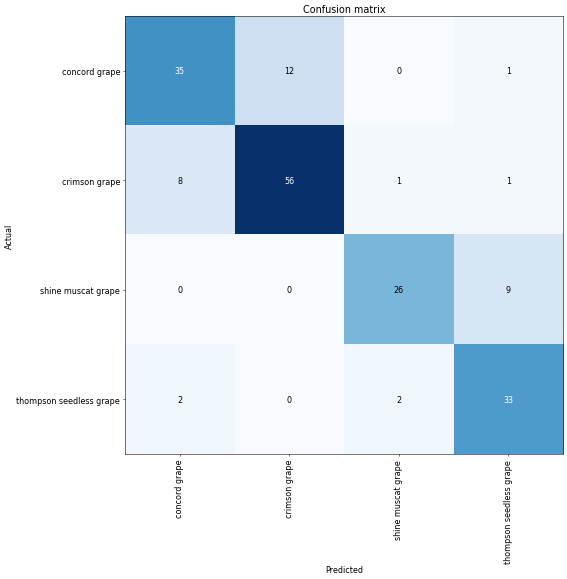

In [26]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=48)

### save model

In [37]:
def get_time_stamp():
  import datetime
  now = datetime.datetime.now()
  timestamp = now.strftime('%Y-%m-%d_%H-%M-%S')
  return timestamp

fname = f'./grape-type_{get_time_stamp()}.pkl'
learn.export(os.path.abspath(fname))
!cp {fname} /content/gdrive/MyDrive/w2/grape-type/

## 3. Test with webcam